<a href="https://colab.research.google.com/github/Viplaw7/Viplaw-s-work/blob/main/Using_Bayesian_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Given thickness, power, and efficiency data
thickness_values = np.array([0.01, 0.02, 0.03, 0.04, 0.05]).reshape(-1, 1)
power_values = np.array([1.825, 1.8326, 1.833, 1.8332, 1.83364])
efficiency_values = np.array([18.25, 18.326, 18.33, 18.332, 18.3364])

# Function to train and evaluate Polynomial Regression model (Degree 2)
def train_polynomial_model(X, y, degree=2):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    return model, poly

# Train models for power and efficiency
power_model, power_poly = train_polynomial_model(thickness_values, power_values)
efficiency_model, efficiency_poly = train_polynomial_model(thickness_values, efficiency_values)

# Function to predict power and efficiency using the trained model
def predict_power(thickness):
    thickness_poly = power_poly.transform(np.array([[thickness]]))
    return power_model.predict(thickness_poly)[0]

def predict_efficiency(thickness):
    thickness_poly = efficiency_poly.transform(np.array([[thickness]]))
    return efficiency_model.predict(thickness_poly)[0]


In [ ]:
!pip install GPyOpt
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.3 MB/s eta 0:00:00
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83602 sha256=262320ffa2c68bae88c0811906bfbef7dda5da140e5e25b33a276025bfc3efc5
  Stored in directory: /root/.cache/pip/wheels/b3/5e/fb/38ca2bae62f9d07f22d246c55dd1f4721ac40f82dc6c2f348c
Successfully built GPyOpt
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In this approach, Machine Learning (ML) and Bayesian Optimization are combined to optimize the thickness of a material for maximum power and efficiency. The first part of the process involves using Machine Learning techniques, specifically polynomial regression, to model the relationship between the material thickness and two important metrics: power and efficiency. Initially, a set of given data points for thickness, power, and efficiency is used to fit polynomial models of degree 2. The polynomial regression models, through PolynomialFeatures and LinearRegression, capture the non-linear relationship between thickness and the two metrics. The thickness values are transformed into higher dimensions to include polynomial terms like x^2 , x^3, which enables the model to better approximate the actual relationship. After training, these models can be used to predict the power and efficiency for any given thickness, providing a way to estimate these metrics for new inputs.

The second part of the process involves Bayesian Optimization, a sophisticated method used to find the optimal solution of a complex, expensive, or non-linear objective function with fewer function evaluations. In this case, the objective function is designed to combine power and efficiency into a single metric, which the optimization algorithm seeks to maximize. Bayesian Optimization builds a probabilistic model of the objective function, using it to predict which thickness values are most likely to lead to high power and efficiency. This process involves an iterative procedure where the optimizer samples different thickness values, calculates the corresponding power and efficiency, and gradually refines its model based on previous evaluations. The algorithm uses acquisition functions to intelligently select new thickness values to evaluate, focusing the search on regions that are likely to yield better results.

The goal is to identify the optimal thickness that results in the highest combined power and efficiency. After running for a set number of iterations, the Bayesian Optimization process identifies this optimal thickness by narrowing down the search space and finding the best solution with fewer evaluations. By combining Machine Learning for prediction and Bayesian Optimization for efficient exploration of the search space, this approach provides a powerful and intelligent method to optimize the thickness of the material while minimizing the number of calculations required. The result is the optimal thickness that balances both power and efficiency, based on the trained polynomial models and guided by the optimization process.

Optimal Thickness: 0.010011163482832024
Predicted Power at Optimal Thickness: 1.8258443402745144
Predicted Efficiency at Optimal Thickness: 18.258443402745144


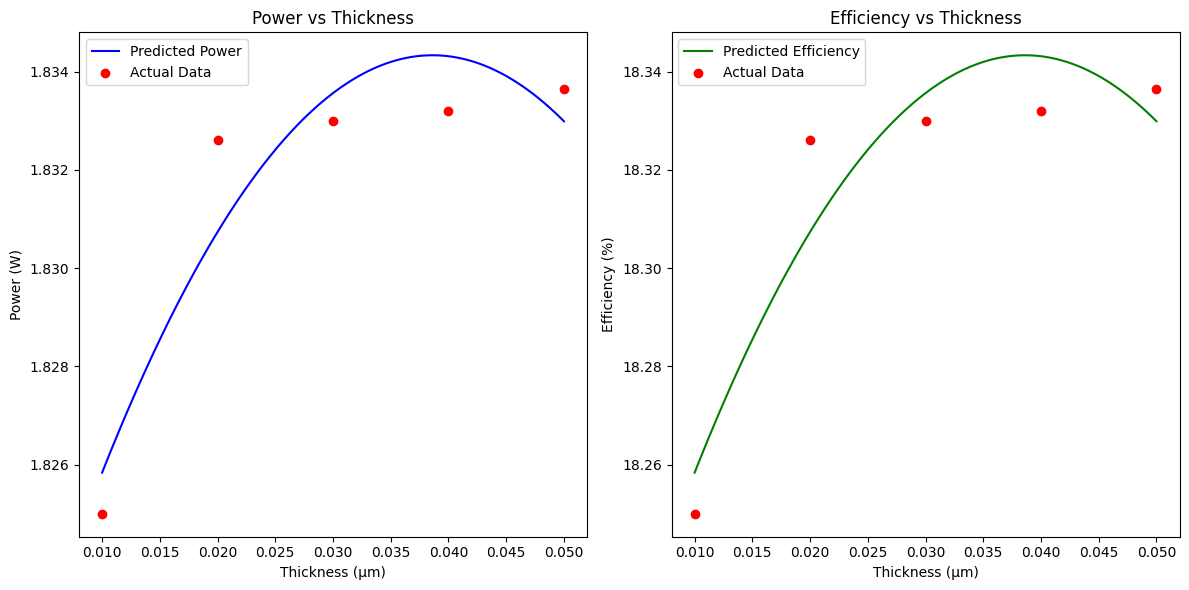

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import GPyOpt

# Given thickness, power, and efficiency data
thickness_values = np.array([0.01, 0.02, 0.03, 0.04, 0.05]).reshape(-1, 1)
power_values = np.array([1.825, 1.8326, 1.833, 1.8332, 1.83364])
efficiency_values = np.array([18.25, 18.326, 18.33, 18.332, 18.3364])

# Ensure thickness is 2D when passed to PolynomialFeatures
def train_polynomial_model(X, y, degree=2):
    X = X.reshape(-1, 1)  # Make sure X is 2D (n_samples, 1)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    return model, poly

# Train polynomial models for Power and Efficiency
power_model, power_poly = train_polynomial_model(thickness_values, power_values, degree=2)
efficiency_model, efficiency_poly = train_polynomial_model(thickness_values, efficiency_values, degree=2)

# Function to predict power and efficiency using the trained model
def predict_power(thickness):
    thickness_poly = power_poly.transform(thickness)
    return power_model.predict(thickness_poly)[0]

def predict_efficiency(thickness):
    thickness_poly = efficiency_poly.transform(thickness)
    return efficiency_model.predict(thickness_poly)[0]

# Objective function for optimization (finds the optimal thickness for max power and efficiency)
def objective_function(x):
    # Reshape the input to be 2D (needed for model prediction)
    thickness = np.array(x).reshape(-1, 1)
    power = predict_power(thickness)
    efficiency = predict_efficiency(thickness)

    # Combine power and efficiency into a single metric (e.g., their sum)
    combined_metric = power + efficiency  # You can modify this metric as needed

    # Return a 2D array as expected by BayesianOptimization
    return np.array([[combined_metric]])

# Define the bounds for optimization
bounds = [{'name': 'thickness', 'type': 'continuous', 'domain': (0.01, 0.05)}]

# Initialize Bayesian Optimization
optimizer = GPyOpt.methods.BayesianOptimization(f=objective_function, domain=bounds)

# Run the optimization
optimizer.run_optimization(max_iter=50)

# Get the optimal thickness found by the optimizer
optimal_point = optimizer.x_opt
optimal_thickness = optimal_point[0]

# Reshape optimal_thickness to a 2D array
optimal_thickness_2d = np.array(optimal_thickness).reshape(-1, 1)

# Get the corresponding power and efficiency at the optimal thickness
optimal_power = predict_power(optimal_thickness_2d)
optimal_efficiency = predict_efficiency(optimal_thickness_2d)

# Print the results
print(f"Optimal Thickness: {optimal_thickness}")
print(f"Predicted Power at Optimal Thickness: {optimal_power}")
print(f"Predicted Efficiency at Optimal Thickness: {optimal_efficiency}")

# Plot the results: Power and Efficiency vs Thickness
thickness_range = np.linspace(0.01, 0.05, 100).reshape(-1, 1)

# Reshape thickness to 2D when passing to the prediction function
predicted_power = [predict_power(thickness.reshape(-1, 1)) for thickness in thickness_range]
predicted_efficiency = [predict_efficiency(thickness.reshape(-1, 1)) for thickness in thickness_range]

plt.figure(figsize=(12, 6))

# Plot Power vs Thickness
plt.subplot(1, 2, 1)
plt.plot(thickness_range, predicted_power, label='Predicted Power', color='blue')
plt.scatter(thickness_values, power_values, color='red', label='Actual Data')
plt.xlabel('Thickness (µm)')
plt.ylabel('Power (W)')
plt.title('Power vs Thickness')
plt.legend()

# Plot Efficiency vs Thickness
plt.subplot(1, 2, 2)
plt.plot(thickness_range, predicted_efficiency, label='Predicted Efficiency', color='green')
plt.scatter(thickness_values, efficiency_values, color='red', label='Actual Data')
plt.xlabel('Thickness (µm)')
plt.ylabel('Efficiency (%)')
plt.title('Efficiency vs Thickness')
plt.legend()

plt.tight_layout()
plt.show()
